# HW 5 Graph Partitions
For the undirected network defined by 9 nodes and the 15 following edges:
(1, 5), (1, 7), (2, 8),(3, 5),(4, 6),(4, 8),(4, 9), (5, 9),(6, 2),(6, 8),(6, 9),(7, 3),(7, 5),(7, 4), (8, 9)

1. Apply the Kernighan-Lin Algorithm to partition the network into 2 disjoint sets of size n1 = 4 and n2 = 5.
* Apply the Girvan-Newman Algorithm and show the resulting dendrogram for the hierarchical clustering according to edge betweenness. Identify the optimal set of communities based on the cut that maximizes the modularity. 
* Apply the Ravasz Algorithm and show the resulting dendrogram for the hierarchical clustering according to Jaccard similarity. Identify the optimal set of communities based on the cut that maximizes the modularity. 
* Find the set of all 2-hop communities in the network. Which nodes belong to multiple communities?
* Compare and discuss the final set of communities you find using each algorithm. 

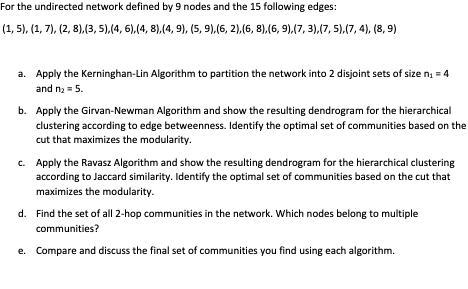

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

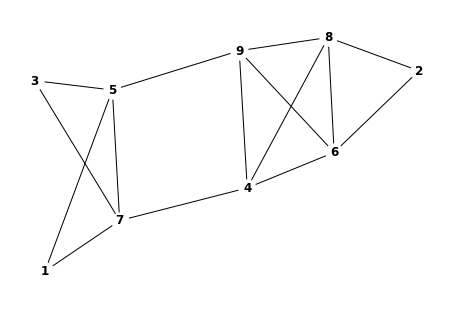

In [684]:
G = nx.Graph()
G.add_edges_from([(1, 5), (1, 7), (2, 8),(3, 5),(4, 6),(4, 8),(4, 9), 
                  (5, 9),(6, 2),(6, 8),(6, 9),(7, 3),(7, 5),(7, 4), (8, 9)])
nx.draw_spring(G, with_labels=True, font_weight='bold',node_color='w')

## Problem 1: Kernighan-Lin Algorithm

In [760]:
# G.clear()
# G.add_edges_from([('a', 'b'), ('a', 'f'), ('a', 'g'),('c', 'd'),('c', 'g'),('d', 'e'),('d', 'h')])
# nx.draw_spring(G, with_labels=True, font_weight='bold',node_color='w')

In [761]:
def cost(part_1, part_2):
    cost = 0
    for i in list(part_1):
        for j in list(part_2):
            cost += G.number_of_edges(i, j)
    return cost

In [762]:
# find external cost, internal cost and D-value for each node
def d_value(node, part_1, part_2):    
    if not output: # first time        
        d = d_in[node]
        #print('node ', node, ' ', internal_cost, ' ', external_cost, ' ', d)
    else: # d'
        if node in part_1:
            d = d_in[node] + 2*cost(node,output[0][0]) - 2*cost(node,output[0][1])
        else:
            d = d_in[node] - 2*cost(node,output[0][0]) + 2*cost(node,output[0][1])        
        #print('node ', node, ' ', d_in[node], ' ', cost(node,output[0][0]), ' ', cost(node,output[0][1]), ' ', d)
    return d

In [763]:
# calculate the gain (cost reduction) and return the swap nodes
def cal_gain(part_1, part_2):
    gain = {}
    for i in part_1:
        for j in part_2:
            if i in swapped or j in swapped:
                continue
            else:
                gain[i,j] = d_in[i] + d_in[j] - 2*cost(i, j)
                #print(i, ' ', j, ' ', gain[i,j])
    # find the largest gain and return nodes for swapping
    maximum = max(gain, key=gain.get)
    return maximum, gain[maximum]

In [764]:
# part1 = ['a','b','c','d']
# part2 = ['e','f','g','h']
G.add_edges_from([('1', '5'), ('1', '7'), ('2', '8'),('3', '5'),('4', '6'),('4', '8'),('4', '9'), 
                  ('5', '9'),('6', '2'),('6', '8'),('6', '9'),('7', '3'),('7', '5'),('7', '4'), ('8', '9')])
part1 = ['1','2','3','4']
part2 = ['5','6','7','8','9']
node_list = part1 + part2
output = []
swapped = []

# prepare for the initial d values
d_in = {}
for node in node_list:
    if node in part1:
        internal_cost = cost(node, part1)
        external_cost = cost(node, part2)
    else:
        internal_cost = cost(node, part2)
        external_cost = cost(node, part1)   
    d_in[node] = external_cost - internal_cost
    #print('node ', node, ' ', internal_cost, ' ', external_cost, ' ', d_in[node])

    
#while set(swapped) != set(node_list):
while len(swapped)+1 != len(node_list):
    output = cal_gain(part1,part2)
    print(output)
    
    # swap
    output0 = output[0][0]
    output1 = output[0][1]
    swapped.append(output0)
    swapped.append(output1)
    
    if output0 in part1:
        part1.remove(output0)
        part1.append(output1)
        part2.remove(output1)
        part2.append(output0)
    else:
        part1.remove(output1)
        part1.append(output0)
        part2.remove(output0)
        part2.append(output1)
    #print(part1)
    #print(part2)
    
    # update d values
    for node in node_list:
        if node in swapped or node in swapped:
                continue
        else:
            if node in part1:
                d_in[node] = d_in[node] + 2*cost(node,output[0][0]) - 2*cost(node,output[0][1])
            else:
                d_in[node] = d_in[node] - 2*cost(node,output[0][0]) + 2*cost(node,output[0][1])   
        #print('node ', node, ' ', internal_cost, ' ', external_cost, ' ', d_in[node])

(('2', '7'), 4)
(('4', '5'), 4)
(('1', '9'), -4)
(('3', '6'), -4)


## Problem 2: Girvan-Newman Algorithm

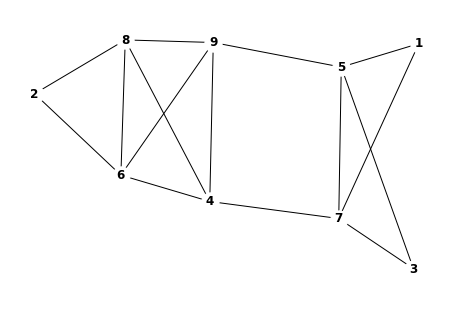

removing edges ...
[(1, 5), (1, 7), (5, 3), (5, 7), (7, 3), (7, 4), (2, 8), (2, 6), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


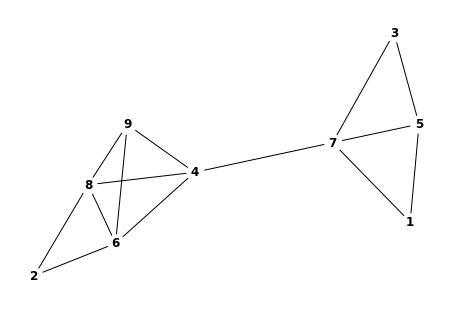

[(1, 5), (1, 7), (5, 3), (5, 7), (7, 3), (2, 8), (2, 6), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


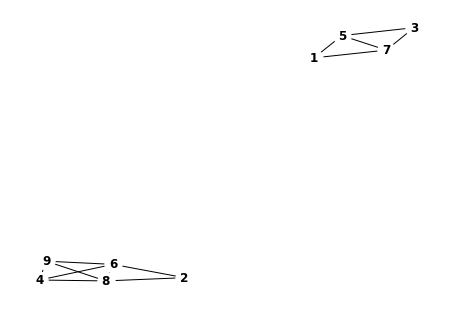

[(1, 5), (1, 7), (5, 3), (5, 7), (7, 3), (2, 6), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


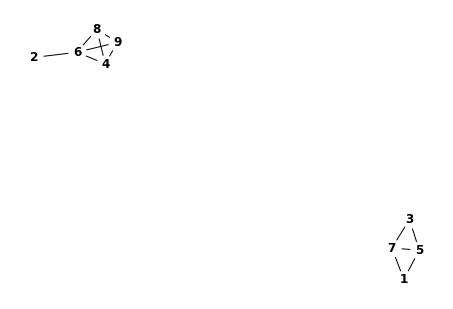

[(1, 5), (1, 7), (5, 3), (5, 7), (7, 3), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


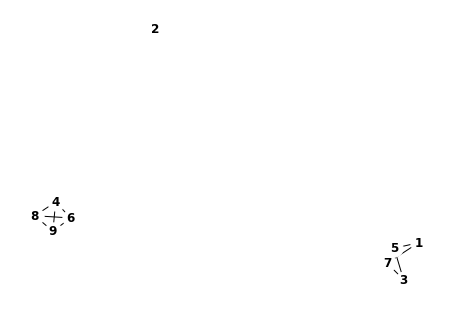

[(1, 7), (5, 3), (5, 7), (7, 3), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


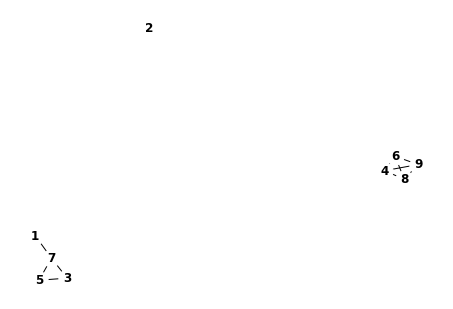

[(5, 3), (5, 7), (7, 3), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


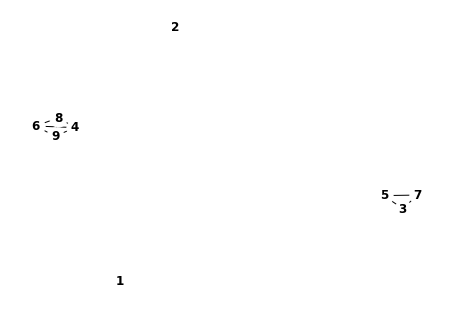

[(5, 7), (7, 3), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


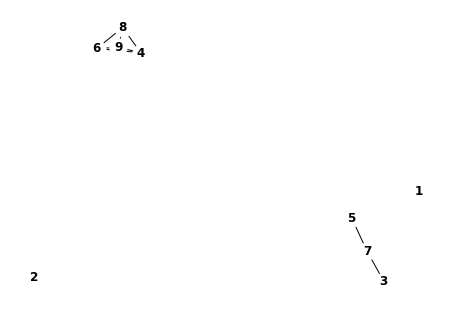

[(7, 3), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


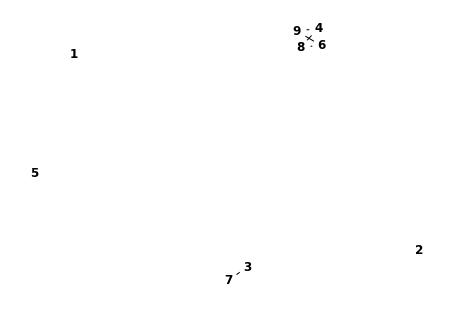

[(8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


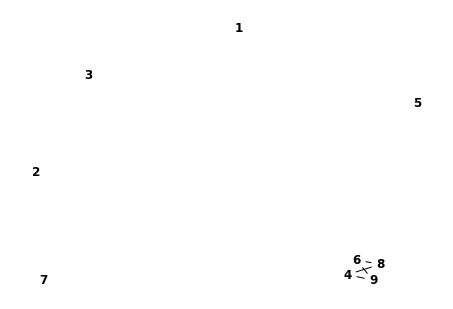

[(8, 6), (8, 9), (4, 6), (4, 9), (6, 9)]


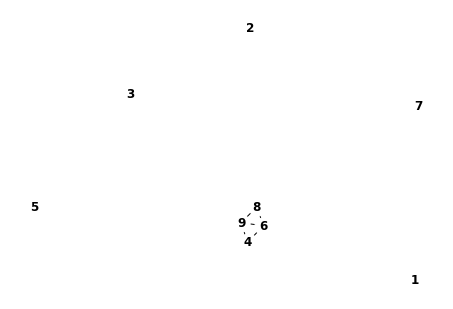

[(8, 9), (4, 6), (4, 9), (6, 9)]


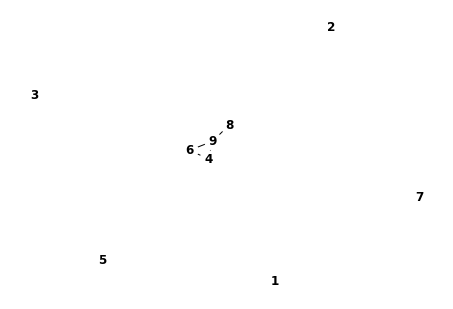

[(4, 6), (4, 9), (6, 9)]


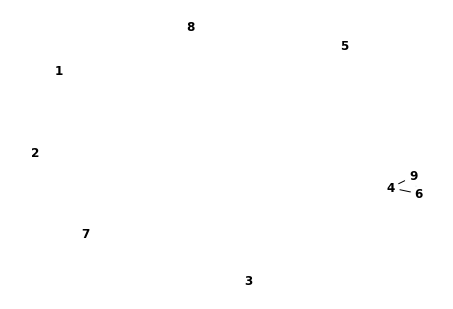

[(4, 9), (6, 9)]


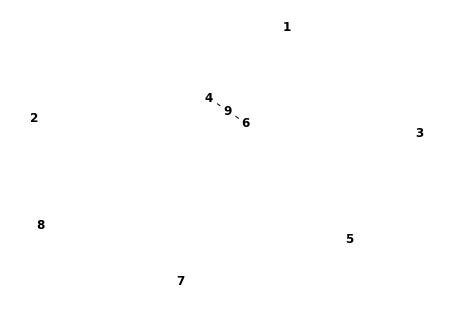

[(6, 9)]


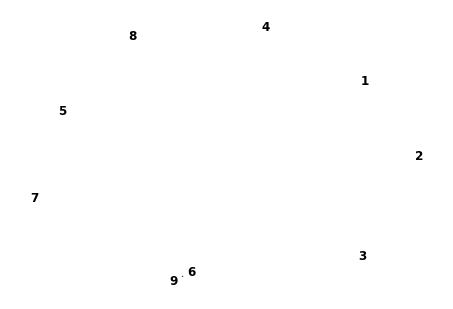

[]


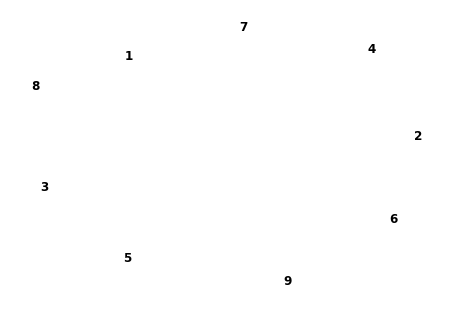

In [707]:
G.clear()
G.add_edges_from([(1, 5), (1, 7), (2, 8),(3, 5),(4, 6),(4, 8),(4, 9), 
                  (5, 9),(6, 2),(6, 8),(6, 9),(7, 3),(7, 5),(7, 4), (8, 9)])
nx.draw_spring(G, with_labels=True, font_weight='bold',node_color='w')
plt.show()

# test - calculate edge betweenness
# nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)

num_edge = len(G.edges)
#print(num_edge) # original number of edges/links
print("removing edges ...")
end = 0 # a marker to break the loop

while num_edge > 0:
    # Step 1: compute the edge betweenness
    edge_btw = nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None)
    # Step 1.1: find the edge with the largest betweenness (if tie, choose one randomly)
    edge_remove = max(edge_btw, key=edge_btw.get)
    #print(edge_remove)
    # Step 2: remove the edge with the largest betweenness
    G.remove_edge(edge_remove[0], edge_remove[1])
    # Step 3: recalculate the betweenness
    # Step 4: Check number of edges
    num_edge = len(G.edges)
    #print(num_edge)
    print(G.edges())
    nx.draw_spring(G, with_labels=True, font_weight='bold', node_color='w')
    plt.show()
    
    # if a node has 0 degree, then break the loop
#     for i in list(G.nodes()):
#         #print(G.degree(i) == 0)
#         if G.degree(i) == 0:
#             end = 1
    
#     if end == 1:
#         break

### Modularity

In [755]:
def part_modularity(partG):
    l = G.number_of_edges()
    lc = partG.number_of_edges()
    kc = 0
    for i in list(partG.nodes()):
        kc += G.degree(i)    
    m = (lc/l) - ((kc/(2*l)) * ((kc/(2*l))))
    print(lc,l,kc,2*l,m)
    return m

In [756]:
# calculate moduality
G = nx.Graph()
G.add_edges_from([(1, 5), (1, 7), (2, 8),(3, 5),(4, 6),(4, 8),(4, 9), 
                  (5, 9),(6, 2),(6, 8),(6, 9),(7, 3),(7, 5),(7, 4), (8, 9)])
G1 = nx.Graph()
G1.add_edges_from([(1, 5), (1, 7), (5, 3), (5, 7), (7, 3)])
G2 = nx.Graph()
G2.add_edges_from([(2, 8), (2, 6), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)])

part_modularity(G1) + part_modularity(G2)

5 15 12 30 0.17333333333333328
8 15 18 30 0.17333333333333334


0.3466666666666666

In [757]:
G1 = nx.Graph()
G1.add_edges_from([(1, 5), (1, 7), (5, 3), (5, 7), (7, 3)])
G2 = nx.Graph()
G2.add_edges_from([(2, 6), (8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)])

part_modularity(G1) + part_modularity(G2)

5 15 12 30 0.17333333333333328
7 15 18 30 0.10666666666666669


0.27999999999999997

In [759]:
G1 = nx.Graph()
G1.add_edges_from([(1, 5), (1, 7), (5, 3), (5, 7), (7, 3)])
G2 = nx.Graph()
G2.add_edges_from([(8, 4), (8, 6), (8, 9), (4, 6), (4, 9), (6, 9)])
G3 = nx.Graph()
G3.add_node(2)

part_modularity(G1) + part_modularity(G2) + part_modularity(G3)

5 15 12 30 0.17333333333333328
6 15 16 30 0.11555555555555558
0 15 2 30 -0.0044444444444444444


0.28444444444444444

## Problem 3: Ravasz Algorithm

In [442]:
# function: Jaccard Similarity
def jaccard(a,b): # input arguements: node a and node b
    neig_a = set([n for n in G.neighbors(a)])
    neig_b = set([n for n in G.neighbors(b)])
    j_value = len(neig_a & neig_b) / len(neig_a | neig_b)
    return j_value

In [443]:
# function: clear s_mtx containing a node in the pair key      
def delmtx(node, ignore_node):
    s_keys = s_mtx.keys()
    for key in s_keys:
        if (key[0] != ignore_node and key[1] != ignore_node) and (key[0] == node or key[1] == node):
            s_mtx[(key[0],key[1])] = 0

Applying Ravasz Algorithm...


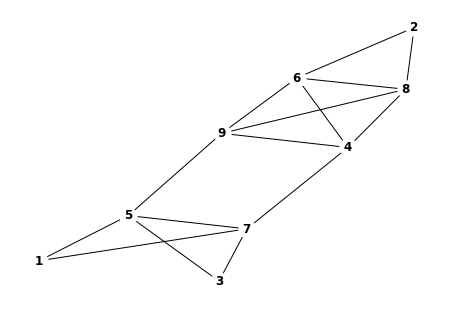

Grouping nodes [1, 3]


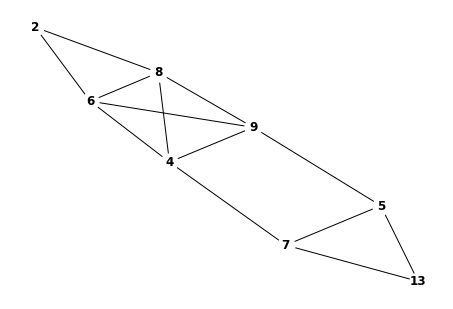

Grouping nodes [6, 8]


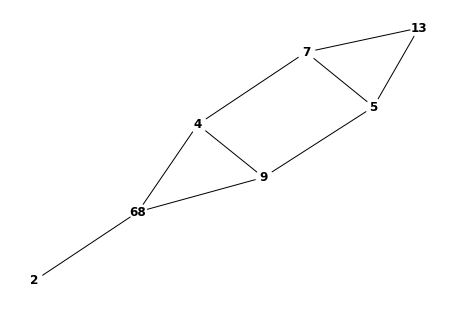

Grouping nodes [2, 4]


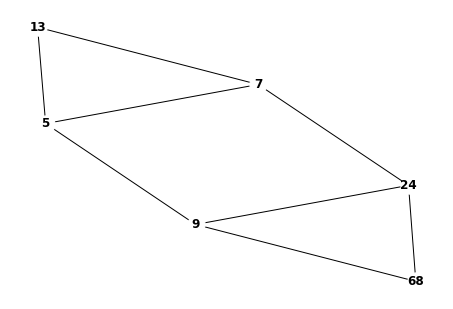

Grouping nodes [5, 7]


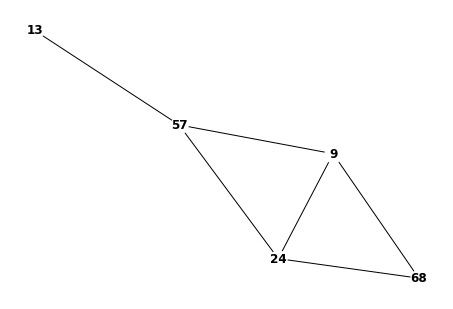

Grouping nodes [9, 68]


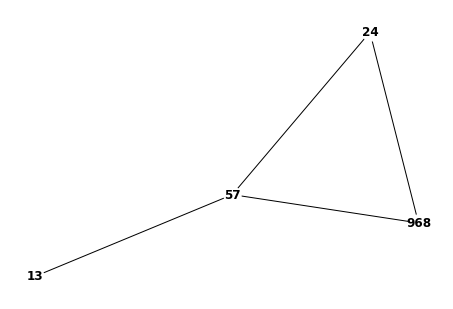

Grouping nodes [24, 968]


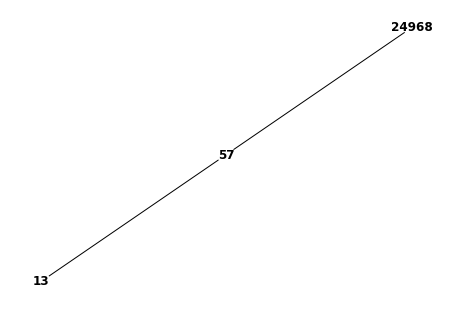

Grouping nodes [13, 57]


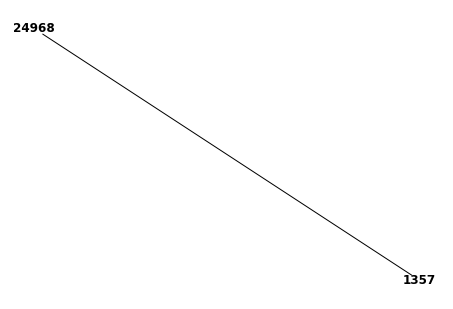

Grouping nodes [24968, 1357]


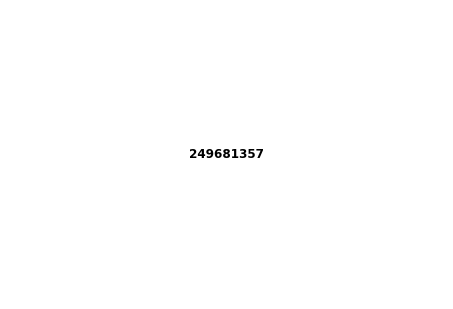

Done!


In [446]:
print ("Applying Ravasz Algorithm...")
G.clear()
G.add_edges_from([(1, 5), (1, 7), (2, 8),(3, 5),(4, 6),(4, 8),(4, 9), 
                  (5, 9),(6, 2),(6, 8),(6, 9),(7, 3),(7, 5),(7, 4), (8, 9)])
nx.draw_spring(G, with_labels=True, font_weight='bold', node_color = 'w')
plt.show()

# build the initial similarity matrix
s_mtx = {}
for i in set(G.nodes()):
    for j in set(G.nodes()):
        if i < j: # don't support nodes named by number with two digits or more
            s_mtx[i,j] = jaccard(i,j)      
            
x = lambda a, b: s_mtx[a, b] if a < b else s_mtx[b, a] # s_mtx: order matters

while 1==1: #sum(s_mtx.values())
    
    if sum(s_mtx.values()): # test if there is only two nodes in the network
        
        # Step 3.2.1: find the community pair with the highest similarity
        max_edge = list(max(s_mtx, key=s_mtx.get))
        print("Grouping nodes " + str(max_edge))

        # Step 3.2.2: merge them to form a single community
        max_node0 = max_edge[0]
        max_node1 = max_edge[1]
        max_node0_neig = set([n for n in G.neighbors(max_node0)])
        max_node1_neig = set([n for n in G.neighbors(max_node1)])
        outer_nodes = list((max_node0_neig | max_node1_neig) - set(max_edge))
        #print("outer_nodes", outer_nodes)

        # update G: remove max_node0 and max_node1, add new node
        new_node = int(str(max_node0) + str(max_node1)) # 'n' means 'new'

        for i in outer_nodes:
            G.add_edges_from([(new_node, i)])
        G.remove_node(max_node0)
        G.remove_node(max_node1)
        nx.draw_spring(G, with_labels=True, font_weight='bold', node_color = 'w')
        plt.show()

        # update the similarity matrix
        for i in outer_nodes:
            # Step 2: define group similarity
            # Scenario 1: a node connecting with both max_node0 and max_node1
            if i in list((max_node0_neig & max_node1_neig)):            
                s_1 = x(max_node0, i)
                s_2 = x(max_node1, i)

                if new_node < i:
                    s_mtx[new_node, i] = (s_1 + s_2) / 2  
                else:
                    s_mtx[i, new_node] = (s_1 + s_2) / 2

            # Scenario 2: a node connecting with either max_node0 or max_node1
            if i in list(max_node0_neig):
                s_1 = x(max_node0, i)
                if new_node < i:
                    s_mtx[new_node, i] = s_1
                else:
                    s_mtx[i, new_node] = s_1
            elif i in list(max_node1_neig):
                s_2 = x(max_node1, i)
                if new_node < i:
                    s_mtx[new_node, i] = s_2
                else:
                    s_mtx[i, new_node] = s_2


        # clear all s_mtx entries associated with max_node0 or max_node1 other than the new node
        delmtx(max_node0, new_node)
        delmtx(max_node1, new_node)
    
    # only two nodes left
    else:        
        max_edge = list(G.nodes())
        print("Grouping nodes " + str(max_edge))
        max_node0 = max_edge[0]
        max_node1 = max_edge[1]
        new_node = int(str(max_node0) + str(max_node1))
        G.clear()
        G.add_node(new_node)
        nx.draw_spring(G, with_labels=True, font_weight='bold', node_color = 'w')
        plt.show()
        print("Done!")
        break

## Problem 4: 2-hop communities

In [671]:
# function: find if a subgroup is with k-hop
def pairlen(node_pair):
    nlist = list(node_pair)
    mark = 0
    for i in nlist:
        for j in nlist: # not the most efficient way for looping
            if i != j:
                splen = nx.shortest_path_length(G, source=i, target=j)
                if  splen > 2: # k = 2
                    return
                else:
                    mark = 1   
    if mark == 1:
        print(nlist)

Find all 2-hop communities...


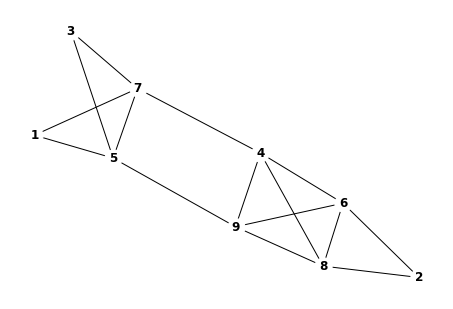

testing subgroup with size =  3
[1, 3, 4]
[1, 3, 5]
[1, 3, 7]
[1, 3, 9]
[1, 4, 5]
[1, 4, 7]
[1, 4, 9]
[1, 5, 7]
[1, 5, 9]
[1, 7, 9]
[2, 4, 6]
[2, 4, 8]
[2, 4, 9]
[2, 6, 8]
[2, 6, 9]
[2, 8, 9]
[3, 4, 5]
[3, 4, 7]
[3, 4, 9]
[3, 5, 7]
[3, 5, 9]
[3, 7, 9]
[4, 5, 6]
[4, 5, 7]
[4, 5, 8]
[4, 5, 9]
[4, 6, 7]
[4, 6, 8]
[4, 6, 9]
[4, 7, 8]
[4, 7, 9]
[4, 8, 9]
[5, 6, 7]
[5, 6, 8]
[5, 6, 9]
[5, 7, 8]
[5, 7, 9]
[5, 8, 9]
[6, 7, 8]
[6, 7, 9]
[6, 8, 9]
[7, 8, 9]
testing subgroup with size =  4
[1, 3, 4, 5]
[1, 3, 4, 7]
[1, 3, 4, 9]
[1, 3, 5, 7]
[1, 3, 5, 9]
[1, 3, 7, 9]
[1, 4, 5, 7]
[1, 4, 5, 9]
[1, 4, 7, 9]
[1, 5, 7, 9]
[2, 4, 6, 8]
[2, 4, 6, 9]
[2, 4, 8, 9]
[2, 6, 8, 9]
[3, 4, 5, 7]
[3, 4, 5, 9]
[3, 4, 7, 9]
[3, 5, 7, 9]
[4, 5, 6, 7]
[4, 5, 6, 8]
[4, 5, 6, 9]
[4, 5, 7, 8]
[4, 5, 7, 9]
[4, 5, 8, 9]
[4, 6, 7, 8]
[4, 6, 7, 9]
[4, 6, 8, 9]
[4, 7, 8, 9]
[5, 6, 7, 8]
[5, 6, 7, 9]
[5, 6, 8, 9]
[5, 7, 8, 9]
[6, 7, 8, 9]
testing subgroup with size =  5
[1, 3, 4, 5, 7]
[1, 3, 4, 5, 9]
[1, 3, 4, 7, 9]
[1, 3, 

In [673]:
# find all possible subgraph with size = 2, 3, 4, ..., 9
#from itertools import combinations

print ("Find all 2-hop communities...")
G.clear()
G.add_edges_from([(1, 5), (1, 7), (2, 8),(3, 5),(4, 6),(4, 8),(4, 9), 
                  (5, 9),(6, 2),(6, 8),(6, 9),(7, 3),(7, 5),(7, 4), (8, 9)])
nx.draw_spring(G, with_labels=True, font_weight='bold', node_color = 'w')
plt.show()

node_list = list(set(G.nodes())) # reorder the nodes in the list

for size in range(3,len(node_list)+1):
    print("testing subgroup with size = ", size)

    comb = combinations(node_list, size) 
    for i in list(comb): 
        #print(i)
        pairlen(i)

## Problem 5: Compare and discuss the final set of communities you find using each algorithm.